In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sqlalchemy import create_engine

In [2]:
# Create a connection to EmployeeSQL database
engine = create_engine('postgresql://localhost:5432/EmployeeSQL')
conn = engine.connect()

In [3]:
# View the table data for employees
df_emp = pd.read_sql('SELECT * FROM employees;', conn)
df_emp.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [4]:
# View the table data for salaries
df_sal = pd.read_sql('SELECT * FROM salaries;', conn)
df_sal

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [5]:
# Merge df_emp and df_sal
df_emp_sal = pd.merge(df_emp, df_sal, on='emp_no')
df_emp_sal

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988,69696
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995,75355
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988,61886
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994,62772


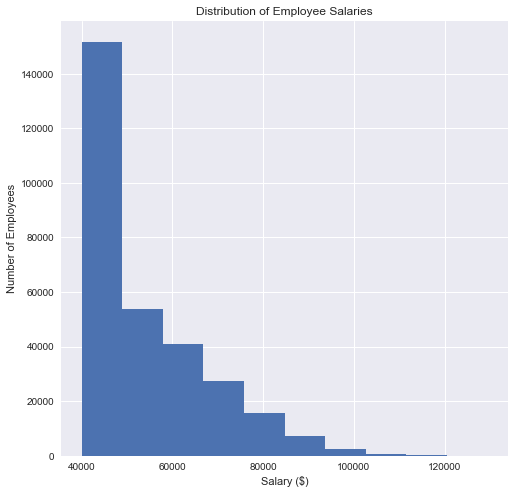

In [6]:
# Create a histogram to visualize the most common salary ranges for employees.
fig, ax = plt.subplots(figsize=(8,8))
ax.hist(df_emp_sal['salary'])
ax.set(title = "Distribution of Employee Salaries",
      xlabel = "Salary ($)",
      ylabel = "Number of Employees");

In [7]:
# View the table data for titles and rename title_id column for merge
df_title = pd.read_sql('SELECT * FROM titles;', conn)
df_title.rename(columns={'title_id': "emp_title_id"}, inplace=True)
# df_title.head()

# Merge df_title with df_emp_sal
df_combo = pd.merge(df_emp_sal, df_title, on='emp_title_id')
df_combo

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,11/9/1959,Arie,Staelin,M,1/1/1985,72446,Manager
300020,111133,m0001,3/16/1955,Hauke,Zhang,M,12/30/1986,71148,Manager
300021,110085,m0001,10/28/1959,Ebru,Alpin,M,1/1/1985,60026,Manager
300022,110386,m0001,10/4/1953,Shem,Kieras,M,10/14/1988,40000,Manager


In [8]:
# Use groupby to calculate the average salary by title
avg_sal = df_combo.groupby('title').mean()['salary']
avg_sal = avg_sal.reset_index()
avg_sal.sort_values(by="salary", inplace=True)
avg_sal

,title,salary
3,Senior Engineer,48506.799871
1,Engineer,48535.336511
0,Assistant Engineer,48564.434447
6,Technique Leader,48582.896092
2,Manager,51531.041667
5,Staff,58465.382850
4,Senior Staff,58550.172704


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

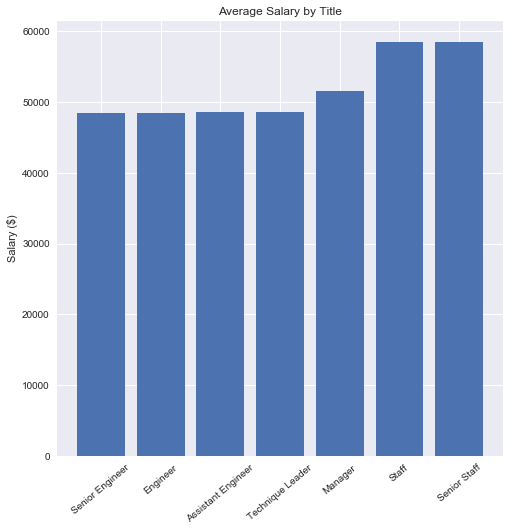

In [9]:
# Create a bar chart of average salary by title.

fig1, ax2 = plt.subplots(figsize=(8,8))
ax2.bar(avg_sal['title'], avg_sal['salary'])
ax2.set(title="Average Salary by Title",
       ylabel="Salary ($)")
plt.xticks(rotation=40)

In [10]:
# Find employee no 499942
df_combo.loc[df_combo['emp_no'] == 499942]

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
287532,499942,e0004,1/10/1963,April,Foolsday,F,2/10/1997,40000,Technique Leader
